In [108]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# from HelperFunctions import minibatch 
%reload_ext autoreload
%autoreload 2
from HelperFunctions import minibatch, dummify_columns, undummify, feature_standardize, label_encode_column, columns_of_type

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics

In [109]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, AdaBoostRegressor
randomForest = RandomForestRegressor()
gbm = GradientBoostingRegressor()
abr = AdaBoostRegressor()
import xgboost as xgb
import lightgbm as lgb

In [110]:
df=pd.read_csv('down_sampled_df.csv')

In [111]:
df.head()

,id,funded_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,mths_since_last_derog_record,derog_records,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,collection_amt,install_util,all_util,rev_credit,inq_last_12m,chargeoff_within_12_mths,delinq_amnt,mths_since_RecentAcc_opened,all_accs_120days+_PastDue_ever,accs_90days+_PastDue_24m,accs_opened_past_12m,pct_acc_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_credit,install_credit,fico,Outstanding_mortgage_debt,revol_frac,install_frac,mort_frac,card_frac,active_card_frac,active_revol_frac,active_install_frac,open_revol_frac,good_acc_frac,loan_duration,profit,RANDOM
0,65251140,25000.0,36,7.89,A,A5,< 1 year,MORTGAGE,94000.0,Source Verified,2015-11-01,Fully Paid,debt_consolidation,933xx,CA,19.36,0.0,1997-09-01,25.0,-999.0,0.0,57.1,30.0,w,0.0,-999.0,Individual,0.0,121.0,-999.0,-999.0,36500.0,-999.0,0.0,0.0,4.0,0.0,0.0,1.0,96.7,0.0,0.0,239880.0,58955.0,702.0,131064.0,0.633333,0.266667,0.100000,0.578947,0.363636,0.368421,-999.0,0.578947,0.500000,34.500000,28136.954317,0.220221
1,62519711,14000.0,36,6.89,A,A3,3 years,RENT,45000.0,Not Verified,2015-10-01,Fully Paid,credit_card,288xx,NC,8.45,0.0,1988-12-01,-999.0,-999.0,0.0,23.5,9.0,w,0.0,-999.0,Individual,0.0,0.0,-999.0,-999.0,60900.0,-999.0,0.0,0.0,34.0,0.0,0.0,0.0,100.0,0.0,0.0,60900.0,0.0,777.0,0.0,0.777778,0.000000,0.222222,0.857143,0.500000,0.428571,-999.0,0.428571,0.333333,37.566667,15571.536315,0.008344
2,50646937,5000.0,36,5.32,A,A1,5 years,MORTGAGE,80000.0,Not Verified,2015-05-01,Fully Paid,debt_consolidation,483xx,MI,10.67,0.0,2008-02-01,-999.0,-999.0,0.0,21.9,32.0,w,0.0,-999.0,Individual,0.0,0.0,-999.0,-999.0,72900.0,-999.0,0.0,0.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,207312.0,29912.0,727.0,98602.0,0.625000,0.343750,0.031250,0.650000,0.538462,0.450000,-999.0,0.750000,0.656250,34.500000,5417.327585,0.412407
3,16442318,6500.0,36,7.69,A,A4,7 years,MORTGAGE,61000.0,Not Verified,2014-05-01,Fully Paid,debt_consolidation,985xx,WA,13.93,0.0,2002-10-01,68.0,-999.0,0.0,33.6,15.0,w,0.0,68.0,Individual,0.0,1101.0,-999.0,-999.0,4200.0,-999.0,0.0,0.0,13.0,4.0,0.0,0.0,73.3,0.0,0.0,217544.0,27075.0,662.0,178608.0,0.400000,0.466667,0.133333,0.500000,0.666667,0.500000,-999.0,0.666667,0.600000,36.533333,7299.283210,0.562369
4,49924755,16000.0,36,5.32,A,A1,10+ years,MORTGAGE,98000.0,Source Verified,2015-06-01,Fully Paid,credit_card,305xx,GA,4.69,1.0,1993-04-01,18.0,-999.0,0.0,27.7,42.0,w,0.0,-999.0,Individual,0.0,0.0,-999.0,-999.0,60100.0,-999.0,0.0,0.0,10.0,0.0,0.0,4.0,97.6,0.0,0.0,254900.0,0.0,747.0,179982.0,0.714286,0.142857,0.119048,0.533333,0.187500,0.166667,-999.0,0.433333,0.333333,36.533333,17336.643738,0.941376


In [112]:
x_train=df.drop(['profit'],axis=1)
y_train=df.profit

In [113]:
cat_list=columns_of_type(x_train,'string')
cat_list

['grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'application_type']

In [114]:
label_encoded_df=label_encode_column(x_train,cat_list)
label_encoded_df

,id,funded_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,mths_since_last_derog_record,derog_records,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,collection_amt,install_util,all_util,rev_credit,inq_last_12m,chargeoff_within_12_mths,delinq_amnt,mths_since_RecentAcc_opened,all_accs_120days+_PastDue_ever,accs_90days+_PastDue_24m,accs_opened_past_12m,pct_acc_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_credit,install_credit,fico,Outstanding_mortgage_debt,revol_frac,install_frac,mort_frac,card_frac,active_card_frac,active_revol_frac,active_install_frac,open_revol_frac,good_acc_frac,loan_duration,RANDOM,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,application_type
0,65251140,25000.0,36,7.89,94000.0,19.36,0.0,25.0,-999.0,0.0,57.1,30.0,0.0,-999.0,0.0,121.0,-999.0,-999.0,36500.0,-999.0,0.0,0.0,4.0,0.0,0.0,1.0,96.7,0.0,0.0,239880.0,58955.0,702.0,131064.0,0.633333,0.266667,0.100000,0.578947,0.363636,0.368421,-999.000000,0.578947,0.500000,34.500000,0.220221,0,4,11,1,1,100,1,2,807,4,410,1,0
1,62519711,14000.0,36,6.89,45000.0,8.45,0.0,-999.0,-999.0,0.0,23.5,9.0,0.0,-999.0,0.0,0.0,-999.0,-999.0,60900.0,-999.0,0.0,0.0,34.0,0.0,0.0,0.0,100.0,0.0,0.0,60900.0,0.0,777.0,0.0,0.777778,0.000000,0.222222,0.857143,0.500000,0.428571,-999.000000,0.428571,0.333333,37.566667,0.008344,0,2,4,5,0,99,1,1,261,27,305,1,0
2,50646937,5000.0,36,5.32,80000.0,10.67,0.0,-999.0,-999.0,0.0,21.9,32.0,0.0,-999.0,0.0,0.0,-999.0,-999.0,72900.0,-999.0,0.0,0.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,207312.0,29912.0,727.0,98602.0,0.625000,0.343750,0.031250,0.650000,0.538462,0.450000,-999.000000,0.750000,0.656250,34.500000,0.412407,0,0,6,1,0,94,1,2,445,22,535,1,0
3,16442318,6500.0,36,7.69,61000.0,13.93,0.0,68.0,-999.0,0.0,33.6,15.0,0.0,68.0,0.0,1101.0,-999.0,-999.0,4200.0,-999.0,0.0,0.0,13.0,4.0,0.0,0.0,73.3,0.0,0.0,217544.0,27075.0,662.0,178608.0,0.400000,0.466667,0.133333,0.500000,0.666667,0.500000,-999.000000,0.666667,0.600000,36.533333,0.562369,0,3,8,1,0,82,1,2,852,47,471,1,0
4,49924755,16000.0,36,5.32,98000.0,4.69,1.0,18.0,-999.0,0.0,27.7,42.0,0.0,-999.0,0.0,0.0,-999.0,-999.0,60100.0,-999.0,0.0,0.0,10.0,0.0,0.0,4.0,97.6,0.0,0.0,254900.0,0.0,747.0,179982.0,0.714286,0.142857,0.119048,0.533333,0.187500,0.166667,-999.000000,0.433333,0.333333,36.533333,0.941376,0,0,2,1,1,95,1,1,278,10,357,1,0
5,79093291,10400.0,36,7.39,60000.0,23.70,0.0,80.0,-999.0,0.0,33.7,56.0,0.0,80.0,0.0,0.0,102.0,79.0,42900.0,0.0,0.0,0.0,2.0,3.0,0.0,4.0,90.9,0.0,0.0,196858.0,83408.0,717.0,59009.0,0.321429,0.625000,0.053571,0.555556,0.300000,0.333333,0.514286,0.555556,0.517857,14.200000,0.199377,0,3,6,1,1,106,1,1,645,36,362,1,0
6,97567331,6000.0,36,7.49,25000.0,1.20,0.0,-999.0,-999.0,0.0,1.9,22.0,0.0,-999.0,0.0,0.0,-999.0,2.0,24600.0,1.0,0.0,0.0,9.0,0.0,0.0,1.0,100.0,0.0,0.0,24600.0,0.0,802.0,0.0,0.500000,0.454545,0.045455,0.454545,0.200000,0.090909,0.000000,0.363636,0.181818,12.166667,0.539149,0,3,1,4,1,115,1,9,814,4,443,1,0
7,69698347,7000.0,36,6.99,35000.0,6.62,0.0,-999.0,-999.0,0.0,36.6,14.0,0.0,-999.0,0.0,0.0,107.0,60.0,22500.0,1.0,0.0,0.0,4.0,0.0,0.0,2.0,100.0,0.0,0.0,222304.0,11000.0,727.0,100145.0,0.714286,0.071429,0.214286,0.500000,0.600000,0.600000,1.000000,0.700000,0.714286,26.333333,0.652596,0,2,3,1,1,102,1,2,690,43,324,0,0
8,39957409,5600.0,36,7.49,43250.0,8.99,0.0,43.0,-999.0,0.0,41.2,25.0,0.0,43.0,0.0,0.0,-999.0,-999.0,13500.0,-999.0,0.0,0.0,5.0,2.0,0.0,2.0,92.0,0.0,0.0,13500.0,0.0,697.0,0.0,0.800000,0.120000,0.080000,0.450000,0.444444,0.350000,-999.000000,0.550000,0.440000,9.100000,0.016946,0,3,2,5,1,90,1,2,678,43,424,1,0
9,414852,5000.0,36,7.68,120000.0,1.27,0.0,-999.0,-999.0,0.0,5.1,15.0,0.0,-999.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.0,-999.0,-999.0,772.0,-999.0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,36.533333,0

In [129]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [135]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
def acc_model(params):
    clf = RandomForestRegressor(**params)
    return cross_val_score(clf, label_encoded_df, y_train,cv=5).mean()

param_space = {
    'max_depth': hp.choice('max_depth', range(3,7)),
    'max_features': hp.choice('max_features', range(2,10))}

best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=100, trials=trials)
print ('best:')
print (best)

  0%|          | 0/100 [00:00<?, ?it/s, best loss: ?]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                            
0.6419151511022804                                   
{'max_depth': 5, 'max_features': 8, 'n_estimators': 200}
  1%|          | 1/100 [00:18<29:47, 18.06s/it, best loss: -0.6419151511022804]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                      
0.6419151511022804                                                             
{'max_depth': 4, 'max_features': 6, 'n_estimators': 100}                       
  2%|▏         | 2/100 [00:24<23:43, 14.52s/it, best loss: -0.6419151511022804]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                      
0.6419151511022804                                                             
{'max_depth': 3, 'max_features': 3, 'n_estimators': 200}                       
  3%|▎         | 3/100 [00:30<19:28, 12.05s/it, best loss: -0.6419151511022804]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                      
0.6419151511022804                                                             
{'max_depth': 5, 'max_features': 5, 'n_estimators': 300}                       
  4%|▍         | 4/100 [00:52<23:48, 14.88s/it, best loss: -0.6419151511022804]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                      
0.6419151511022804                                                             
{'max_depth': 4, 'max_features': 8, 'n_estimators': 100}                       
  5%|▌         | 5/100 [01:00<20:39, 13.04s/it, best loss: -0.6419151511022804]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                      
0.6419151511022804                                                             
{'max_depth': 4, 'max_features': 4, 'n_estimators': 300}                       
  6%|▌         | 6/100 [01:15<21:17, 13.59s/it, best loss: -0.6419151511022804]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                      
0.6419151511022804                                                             
{'max_depth': 5, 'max_features': 5, 'n_estimators': 100}                       
  7%|▋         | 7/100 [01:23<18:08, 11.70s/it, best loss: -0.6419151511022804]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                      
0.6419151511022804                                                             
{'max_depth': 5, 'max_features': 6, 'n_estimators': 400}                       
  8%|▊         | 8/100 [01:56<28:04, 18.31s/it, best loss: -0.6419151511022804]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                      
0.6419151511022804                                                             
{'max_depth': 6, 'max_features': 2, 'n_estimators': 200}                       
  9%|▉         | 9/100 [02:04<23:10, 15.28s/it, best loss: -0.6419151511022804]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                      
0.6419151511022804                                                             
{'max_depth': 3, 'max_features': 9, 'n_estimators': 100}                       
 10%|█         | 10/100 [02:12<19:36, 13.07s/it, best loss: -0.6419151511022804]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.6578173035256608                                                              
{'max_depth': 6, 'max_features': 7, 'n_estimators': 300}                        
 11%|█         | 11/100 [02:48<29:31, 19.91s/it, best loss: -0.6578173035256608]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.6578173035256608                                                              
{'max_depth': 4, 'max_features': 8, 'n_estimators': 400}                        
 12%|█▏        | 12/100 [03:23<35:50, 24.44s/it, best loss: -0.6578173035256608]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.6578173035256608                                                              
{'max_depth': 6, 'max_features': 6, 'n_estimators': 200}                        
 13%|█▎        | 13/100 [03:44<33:47, 23.30s/it, best loss: -0.6578173035256608]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.6578173035256608                                                              
{'max_depth': 6, 'max_features': 2, 'n_estimators': 200}                        
 14%|█▍        | 14/100 [03:55<27:59, 19.53s/it, best loss: -0.6578173035256608]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.6578173035256608                                                              
{'max_depth': 3, 'max_features': 6, 'n_estimators': 300}                        
 15%|█▌        | 15/100 [04:11<26:27, 18.67s/it, best loss: -0.6578173035256608]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.6578173035256608                                                              
{'max_depth': 6, 'max_features': 3, 'n_estimators': 300}                        
 16%|█▌        | 16/100 [04:29<25:36, 18.30s/it, best loss: -0.6578173035256608]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.6578173035256608                                                              
{'max_depth': 6, 'max_features': 6, 'n_estimators': 100}                        
 17%|█▋        | 17/100 [04:39<21:58, 15.89s/it, best loss: -0.6578173035256608]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.6926604433351534                                                              
{'max_depth': 6, 'max_features': 8, 'n_estimators': 400}                        
 18%|█▊        | 18/100 [05:33<37:09, 27.19s/it, best loss: -0.6926604433351534]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.6926604433351534                                                              
{'max_depth': 4, 'max_features': 4, 'n_estimators': 400}                        
 19%|█▉        | 19/100 [05:51<33:16, 24.65s/it, best loss: -0.6926604433351534]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.6926604433351534                                                              
{'max_depth': 5, 'max_features': 3, 'n_estimators': 300}                        
 20%|██        | 20/100 [06:05<28:29, 21.37s/it, best loss: -0.6926604433351534]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.6926604433351534                                                              
{'max_depth': 6, 'max_features': 7, 'n_estimators': 400}                        
 21%|██        | 21/100 [06:53<38:35, 29.31s/it, best loss: -0.6926604433351534]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.6926604433351534                                                              
{'max_depth': 6, 'max_features': 7, 'n_estimators': 400}                        
 22%|██▏       | 22/100 [07:40<45:12, 34.78s/it, best loss: -0.6926604433351534]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.6926604433351534                                                              
{'max_depth': 6, 'max_features': 7, 'n_estimators': 300}                        
 23%|██▎       | 23/100 [08:15<44:26, 34.63s/it, best loss: -0.6926604433351534]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7224725867520649                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 400}                        
 24%|██▍       | 24/100 [09:13<53:02, 41.88s/it, best loss: -0.7224725867520649]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7224725867520649                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 400}                        
 25%|██▌       | 25/100 [10:18<1:00:43, 48.58s/it, best loss: -0.7224725867520649]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                         
0.7295964220013822                                                                
{'max_depth': 6, 'max_features': 9, 'n_estimators': 400}                          
 26%|██▌       | 26/100 [11:18<1:04:22, 52.20s/it, best loss: -0.7295964220013822]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                         
0.7295964220013822                                                                
{'max_depth': 3, 'max_features': 9, 'n_estimators': 400}                          
 27%|██▋       | 27/100 [11:50<55:56, 45.98s/it, best loss: -0.7295964220013822]  

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7295964220013822                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 400}                        
 28%|██▊       | 28/100 [12:51<1:00:41, 50.58s/it, best loss: -0.7295964220013822]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                         
0.7295964220013822                                                                
{'max_depth': 6, 'max_features': 9, 'n_estimators': 400}                          
 29%|██▉       | 29/100 [13:52<1:03:21, 53.54s/it, best loss: -0.7295964220013822]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                         
0.7295964220013822                                                                
{'max_depth': 6, 'max_features': 9, 'n_estimators': 400}                          
 30%|███       | 30/100 [14:52<1:04:50, 55.59s/it, best loss: -0.7295964220013822]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                         
0.7295964220013822                                                                
{'max_depth': 6, 'max_features': 9, 'n_estimators': 400}                          
 31%|███       | 31/100 [15:51<1:05:17, 56.77s/it, best loss: -0.7295964220013822]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                         
0.7295964220013822                                                                
{'max_depth': 3, 'max_features': 9, 'n_estimators': 400}                          
 32%|███▏      | 32/100 [16:31<58:38, 51.74s/it, best loss: -0.7295964220013822]  

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7295964220013822                                                              
{'max_depth': 5, 'max_features': 5, 'n_estimators': 200}                        
 33%|███▎      | 33/100 [16:51<47:06, 42.19s/it, best loss: -0.7295964220013822]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7295964220013822                                                              
{'max_depth': 4, 'max_features': 2, 'n_estimators': 400}                        
 34%|███▍      | 34/100 [17:09<38:17, 34.81s/it, best loss: -0.7295964220013822]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7295964220013822                                                              
{'max_depth': 6, 'max_features': 4, 'n_estimators': 100}                        
 35%|███▌      | 35/100 [17:19<29:46, 27.49s/it, best loss: -0.7295964220013822]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7295964220013822                                                              
{'max_depth': 3, 'max_features': 9, 'n_estimators': 400}                        
 36%|███▌      | 36/100 [18:02<34:11, 32.05s/it, best loss: -0.7295964220013822]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7295964220013822                                                              
{'max_depth': 5, 'max_features': 5, 'n_estimators': 400}                        
 37%|███▋      | 37/100 [18:43<36:36, 34.87s/it, best loss: -0.7295964220013822]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7295964220013822                                                              
{'max_depth': 4, 'max_features': 3, 'n_estimators': 200}                        
 38%|███▊      | 38/100 [18:55<28:38, 27.72s/it, best loss: -0.7295964220013822]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7311918914455239                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 100}                        
 39%|███▉      | 39/100 [19:15<26:05, 25.67s/it, best loss: -0.7311918914455239]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7311918914455239                                                              
{'max_depth': 5, 'max_features': 8, 'n_estimators': 100}                        
 40%|████      | 40/100 [19:31<22:39, 22.66s/it, best loss: -0.7311918914455239]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7311918914455239                                                              
{'max_depth': 4, 'max_features': 4, 'n_estimators': 100}                        
 41%|████      | 41/100 [19:38<17:40, 17.97s/it, best loss: -0.7311918914455239]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7311918914455239                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 100}                        
 42%|████▏     | 42/100 [19:59<18:10, 18.80s/it, best loss: -0.7311918914455239]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7311918914455239                                                              
{'max_depth': 3, 'max_features': 2, 'n_estimators': 100}                        
 43%|████▎     | 43/100 [20:02<13:28, 14.19s/it, best loss: -0.7311918914455239]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7311918914455239                                                              
{'max_depth': 6, 'max_features': 5, 'n_estimators': 100}                        
 44%|████▍     | 44/100 [20:15<12:44, 13.65s/it, best loss: -0.7311918914455239]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7311918914455239                                                              
{'max_depth': 5, 'max_features': 9, 'n_estimators': 100}                        
 45%|████▌     | 45/100 [20:32<13:32, 14.77s/it, best loss: -0.7311918914455239]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7311918914455239                                                              
{'max_depth': 6, 'max_features': 8, 'n_estimators': 100}                        
 46%|████▌     | 46/100 [20:51<14:25, 16.02s/it, best loss: -0.7311918914455239]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7311918914455239                                                              
{'max_depth': 4, 'max_features': 6, 'n_estimators': 200}                        
 47%|████▋     | 47/100 [21:11<15:17, 17.31s/it, best loss: -0.7311918914455239]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7311918914455239                                                              
{'max_depth': 6, 'max_features': 3, 'n_estimators': 100}                        
 48%|████▊     | 48/100 [21:20<12:41, 14.64s/it, best loss: -0.7311918914455239]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7311918914455239                                                              
{'max_depth': 3, 'max_features': 2, 'n_estimators': 300}                        
 49%|████▉     | 49/100 [21:30<11:17, 13.28s/it, best loss: -0.7311918914455239]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7311918914455239                                                              
{'max_depth': 6, 'max_features': 4, 'n_estimators': 200}                        
 50%|█████     | 50/100 [21:50<12:46, 15.32s/it, best loss: -0.7311918914455239]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7311918914455239                                                              
{'max_depth': 5, 'max_features': 9, 'n_estimators': 100}                        
 51%|█████     | 51/100 [22:04<12:06, 14.84s/it, best loss: -0.7311918914455239]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7311918914455239                                                              
{'max_depth': 6, 'max_features': 7, 'n_estimators': 300}                        
 52%|█████▏    | 52/100 [22:47<18:46, 23.47s/it, best loss: -0.7311918914455239]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7311918914455239                                                              
{'max_depth': 4, 'max_features': 6, 'n_estimators': 100}                        
 53%|█████▎    | 53/100 [22:56<14:49, 18.93s/it, best loss: -0.7311918914455239]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7311918914455239                                                              
{'max_depth': 6, 'max_features': 8, 'n_estimators': 300}                        
 54%|█████▍    | 54/100 [23:42<20:54, 27.27s/it, best loss: -0.7311918914455239]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 200}                        
 55%|█████▌    | 55/100 [24:17<22:06, 29.48s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 3, 'max_features': 5, 'n_estimators': 200}                        
 56%|█████▌    | 56/100 [24:28<17:32, 23.91s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 3, 'n_estimators': 200}                        
 57%|█████▋    | 57/100 [24:41<14:54, 20.80s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 200}                        
 58%|█████▊    | 58/100 [25:16<17:26, 24.93s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 5, 'max_features': 7, 'n_estimators': 200}                        
 59%|█████▉    | 59/100 [25:39<16:40, 24.40s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 4, 'max_features': 6, 'n_estimators': 200}                        
 60%|██████    | 60/100 [25:55<14:38, 21.97s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 200}                        
 61%|██████    | 61/100 [26:30<16:45, 25.77s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 2, 'n_estimators': 200}                        
 62%|██████▏   | 62/100 [26:40<13:18, 21.02s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 3, 'max_features': 4, 'n_estimators': 200}                        
 63%|██████▎   | 63/100 [26:49<10:46, 17.47s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 100}                        
 64%|██████▍   | 64/100 [27:07<10:29, 17.47s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 8, 'n_estimators': 300}                        
 65%|██████▌   | 65/100 [27:53<15:18, 26.23s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 400}                        
 66%|██████▌   | 66/100 [29:01<21:50, 38.56s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 400}                        
 67%|██████▋   | 67/100 [29:59<24:29, 44.54s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 200}                        
 68%|██████▊   | 68/100 [30:29<21:24, 40.14s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 400}                        
 69%|██████▉   | 69/100 [31:27<23:32, 45.56s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 100}                        
 70%|███████   | 70/100 [31:42<18:07, 36.26s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 400}                        
 71%|███████   | 71/100 [32:42<20:57, 43.37s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 300}                        
 72%|███████▏  | 72/100 [33:26<20:21, 43.64s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 7, 'n_estimators': 100}                        
 73%|███████▎  | 73/100 [33:38<15:18, 34.01s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 5, 'max_features': 3, 'n_estimators': 400}                        
 74%|███████▍  | 74/100 [33:57<12:49, 29.60s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 5, 'n_estimators': 200}                        
 75%|███████▌  | 75/100 [34:14<10:47, 25.88s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 4, 'max_features': 9, 'n_estimators': 400}                        
 76%|███████▌  | 76/100 [34:54<11:59, 29.97s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 3, 'max_features': 9, 'n_estimators': 100}                        
 77%|███████▋  | 77/100 [35:01<08:56, 23.33s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 2, 'n_estimators': 200}                        
 78%|███████▊  | 78/100 [35:10<06:55, 18.91s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 4, 'n_estimators': 400}                        
 79%|███████▉  | 79/100 [35:39<07:39, 21.88s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 5, 'max_features': 6, 'n_estimators': 100}                        
 80%|████████  | 80/100 [35:47<05:58, 17.91s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 300}                        
 81%|████████  | 81/100 [36:31<08:04, 25.51s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 4, 'max_features': 9, 'n_estimators': 300}                        
 82%|████████▏ | 82/100 [37:00<07:59, 26.65s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 8, 'n_estimators': 300}                        
 83%|████████▎ | 83/100 [37:39<08:37, 30.45s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 3, 'max_features': 3, 'n_estimators': 300}                        
 84%|████████▍ | 84/100 [37:49<06:25, 24.11s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 5, 'n_estimators': 300}                        
 85%|████████▌ | 85/100 [38:15<06:09, 24.65s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 7, 'n_estimators': 300}                        
 86%|████████▌ | 86/100 [38:49<06:28, 27.74s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 5, 'max_features': 9, 'n_estimators': 300}                        
 87%|████████▋ | 87/100 [39:26<06:33, 30.30s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 300}                        
 88%|████████▊ | 88/100 [40:10<06:54, 34.57s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 4, 'max_features': 2, 'n_estimators': 300}                        
 89%|████████▉ | 89/100 [40:19<04:54, 26.81s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 4, 'n_estimators': 300}                        
 90%|█████████ | 90/100 [40:41<04:13, 25.36s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 3, 'max_features': 9, 'n_estimators': 300}                        
 91%|█████████ | 91/100 [41:03<03:40, 24.51s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 6, 'n_estimators': 300}                        
 92%|█████████▏| 92/100 [41:34<03:29, 26.23s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 8, 'n_estimators': 300}                        
 93%|█████████▎| 93/100 [42:16<03:36, 30.93s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 5, 'max_features': 5, 'n_estimators': 300}                        
 94%|█████████▍| 94/100 [42:38<02:49, 28.25s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 300}                        
 95%|█████████▌| 95/100 [43:21<02:44, 32.84s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 4, 'max_features': 3, 'n_estimators': 300}                        
 96%|█████████▌| 96/100 [43:33<01:46, 26.58s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 7, 'n_estimators': 300}                        
 97%|█████████▋| 97/100 [44:08<01:27, 29.04s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 3, 'max_features': 9, 'n_estimators': 200}                        
 98%|█████████▊| 98/100 [44:24<00:50, 25.29s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 2, 'n_estimators': 300}                        
 99%|█████████▉| 99/100 [44:37<00:21, 21.59s/it, best loss: -0.7339159812849383]

/home/auscheng/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)



new best:                                                                       
0.7339159812849383                                                              
{'max_depth': 6, 'max_features': 9, 'n_estimators': 200}                        
100%|██████████| 100/100 [45:07<00:00, 23.97s/it, best loss: -0.7339159812849383]
best:
{'max_depth': 3, 'max_features': 7, 'n_estimators': 1}


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

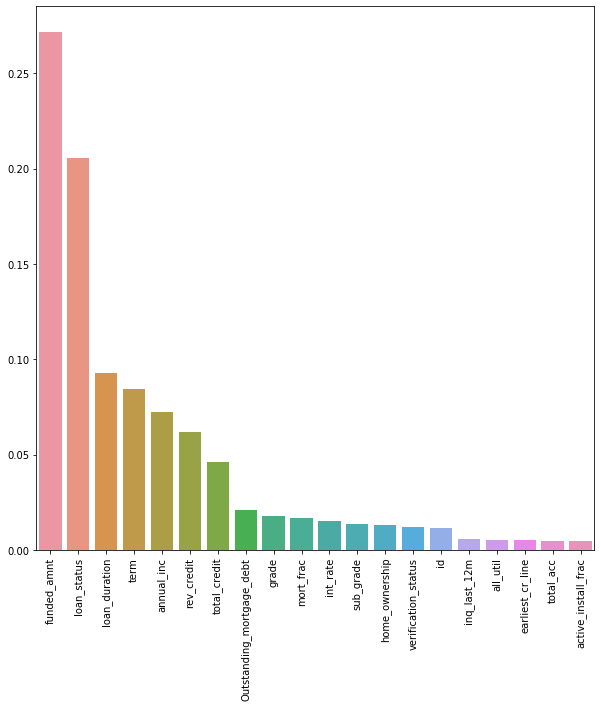

In [139]:
randomForest.set_params(n_estimators=100,criterion="mse",bootstrap=True,oob_score = False,n_jobs=-1,random_state=0,\
                       max_depth=best['max_depth'],max_features=best['max_features'])
randomForest.fit(label_encoded_df,y_train)
feature_importance=pd.Series(randomForest.feature_importances_,index=label_encoded_df.columns)
feature_importance.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(10,10))
sns.barplot(x=feature_importance.index[0:20],y=feature_importance.values[0:20])
plt.xticks(rotation=90)

In [142]:
def acc_model(params):
    clf = GradientBoostingRegressor(n_estimators=100,max_features='sqrt',min_samples_leaf=5,random_state=0,**params)
    return cross_val_score(clf, label_encoded_df, y_train,cv=5).mean()

param_space = {
    'learning_rate':hp.choice('learning_rate', np.linspace(0.1,0.3,3)),
    'max_depth': hp.choice('max_depth', range(3,7)),
    'min_samples_split': hp.choice('min_samples_split', range(3,7))}

best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=100, trials=trials)
print ('best:')
print (best)

new best:                                            
0.9482159054464556                                   
{'learning_rate': 0.2, 'max_depth': 6, 'min_samples_split': 5}
new best:                                                                      
0.9482159054464556                                                             
{'learning_rate': 0.3, 'max_depth': 4, 'min_samples_split': 4}                 
new best:                                                                      
0.9482159054464556                                                             
{'learning_rate': 0.2, 'max_depth': 6, 'min_samples_split': 5}                 
new best:                                                                      
0.9482159054464556                                                             
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 4}                 
new best:                                                                      
0.9482159054464556           

new best:                                                                       
0.9512445379601028                                                              
{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 6}                  
new best:                                                                       
0.9512445379601028                                                              
{'learning_rate': 0.2, 'max_depth': 5, 'min_samples_split': 6}                  
new best:                                                                       
0.9512445379601028                                                              
{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 3}                  
new best:                                                                       
0.9512445379601028                                                              
{'learning_rate': 0.3, 'max_depth': 5, 'min_samples_split': 5}                  
new best:                   

{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 4}                  
new best:                                                                       
0.9512445379601028                                                              
{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 4}                  
new best:                                                                       
0.9512445379601028                                                              
{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 6}                  
new best:                                                                       
0.9512445379601028                                                              
{'learning_rate': 0.1, 'max_depth': 6, 'min_samples_split': 3}                  
new best:                                                                       
0.9512445379601028                                                              
{'learning_rate': 0.1, 'max_

In [146]:
#visualize best predictors
gbm.set_params(n_estimators=100,learning_rate=0.1,criterion="mse",random_state=0,\
                       max_depth=6,min_samples_split=4)
gbm.fit(label_encoded_df,y_train)
gbm_feature_importance=pd.Series(gbm.feature_importances_,index=label_encoded_df.columns)
gbm_feature_importance.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(10,10))
sns.barplot(x=gbm_feature_importance.index[0:20],y=gbm_feature_importance.values[0:20])
plt.xticks(rotation=90)

NameError: name 'label_encoded' is not defined

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

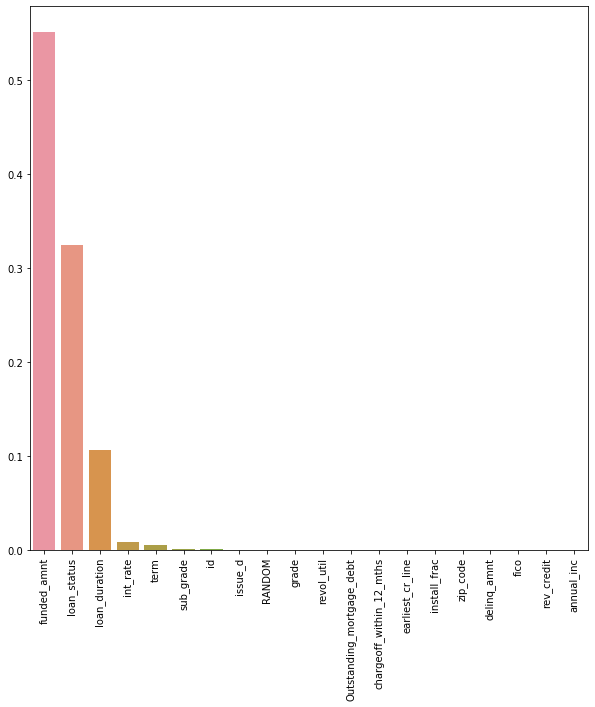

In [147]:
gbm_feature_importance=pd.Series(gbm.feature_importances_,index=label_encoded_df.columns)
gbm_feature_importance.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(10,10))
sns.barplot(x=gbm_feature_importance.index[0:20],y=gbm_feature_importance.values[0:20])
plt.xticks(rotation=90)

In [ ]:
boost_param_grid = {'learning_rate': np.linspace(0.05,0.3,6), 'max_depth': range(3,8),'min_samples_split': range(2,8)}
grid_search_boost = GridSearchCV(ensemble.GradientBoostingRegressor(n_estimators=100,max_features='sqrt',min_samples_leaf=5,random_state=0), param_grid = boost_param_grid, cv = 5, scoring = 'neg_mean_squared_error', n_jobs=-1)
grid_search_boost.fit(label_encoded_df, y_train)
gbm.set_params(n_estimators=200,learning_rate=grid_search_boost.best_params_['learning_rate'],criterion="mse",random_state=0,\
                       max_depth=grid_search_boost.best_params_['max_depth'],min_samples_split=grid_search_boost.best_params_['min_samples_split'])
gbm.fit(label_encoded_df, y_train)
gbm_feature_importance=pd.Series(gbm.feature_importances_,index=x_train.columns)
gbm_feature_importance.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(10,10))
sns.barplot(x=gbm_feature_importance.index[0:50],y=gbm_feature_importance.values[0:50])
plt.xticks(rotation=90)